# Kobe Shots

Our goal is to develop a model using regression to determine how many shots Kobe Bryant made in his career.  Your model should consider the following:

- EDA and feature description
- Data Cleaning
- New Features from old
- Train/Test Split
- Cross-Validation
- Comparison of `LinearRegression`, `Ridge`, `Lasso`, and `ElasticNet` regression models (don't forget to scale!)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [7]:
kobe = pd.read_csv('kobe_stats.csv').drop(kobe.columns[0], axis =1)

In [8]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [9]:
#create y and X 
y = kobe.SHOTS_MADE
X = kobe.drop(labels = "SHOTS_MADE", axis = 1)

In [10]:
#scale X
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [11]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y)
print(X_train.shape, y_train.shape)

(1168, 644) (1168,)


In [22]:
#try a linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('train_score_r2:', lr.score(X_train,y_train))
print('test_score_r2:', lr.score(X_test,y_test))
preds = lr.predict(X_test)
print('mse:', mean_squared_error(preds, y_test))

#look at the crazy difference between train score and test score. 
#See how the train score looks really good but the test score is nonsensical?
#This is clear indicator that your model is overfitted and very unstable. 

train_score_r2: 0.801036816189
test_score_r2: -1.0923605881e+28
mse: 1.40734538506e+29


In [23]:
#let's try a regularized model and gridsearch to find the best alpha

#instantiate the model
lasso = Lasso()

#create a params dictionary of alphas to test in the gridsearch
params = {'alpha': [0.1, 0.3, 0.5]}

#run the gridsearch with cross-validation = 3
gs = GridSearchCV(lasso, param_grid = params, cv = 3)

#fit the training data
gs.fit(X_train, y_train)

#show best score with train data
print('train_score:', gs.best_score_)

#get the best model parameters
best_model = gs.best_estimator_

#use the best model to score the test
print('test_score:', best_model.score(X_test,y_test))

#get predictions using the best model
preds = best_model.predict(X_test)

#get mean squared error
print('mse:', mean_squared_error(preds, y_test))

#now this looks better though still there is a 10% difference between the train and test score
#might still want to investigate whether this is overfitted or if it's just tuning the alpha parameters

train_score: 0.608807358769
test_score: 0.699159575927
mse: 3.87588482292


In [24]:
#we might want to investigate what the scores for the cross validation was:
gs.cv_results_

#compare train scores to test scores - you see standard deviations between each cross validation was small
#but the difference between test and train is fairly significant in some splits. 

{'mean_fit_time': array([ 0.13319643,  0.03184883,  0.02661443]),
 'mean_score_time': array([ 0.00070437,  0.00069261,  0.00071367]),
 'mean_test_score': array([ 0.60880736,  0.59129641,  0.56516433]),
 'mean_train_score': array([ 0.71778062,  0.60727888,  0.57396803]),
 'param_alpha': masked_array(data = [0.1 0.3 0.5],
              mask = [False False False],
        fill_value = ?),
 'params': ({'alpha': 0.1}, {'alpha': 0.3}, {'alpha': 0.5}),
 'rank_test_score': array([1, 2, 3], dtype=int32),
 'split0_test_score': array([ 0.64896556,  0.63396473,  0.60691543]),
 'split0_train_score': array([ 0.70671742,  0.5918313 ,  0.55266436]),
 'split1_test_score': array([ 0.61750063,  0.59915058,  0.57070649]),
 'split1_train_score': array([ 0.72045715,  0.60671341,  0.57046512]),
 'split2_test_score': array([ 0.55985265,  0.54066422,  0.51776376]),
 'split2_train_score': array([ 0.72616729,  0.62329193,  0.5987746 ]),
 'std_fit_time': array([ 0.03399539,  0.00446689,  0.00183723]),
 'std_score

In [25]:
#let's try a ridge model - same process as above

ridge = Ridge()
params = {'alpha': [0.1, 0.2, 0.3, 0.4]}
gs = GridSearchCV(ridge, param_grid = params, cv = 3)
gs.fit(X_train, y_train)
print('train_score', gs.best_score_)
best_model = gs.best_estimator_
print('test_score', best_model.score(X_test,y_test))
preds = best_model.predict(X_test)
print('mse', mean_squared_error(preds, y_test))

train_score 0.275916772699
test_score 0.47214014035
mse 6.80069516905


In [26]:
gs.cv_results_

#here we see small std between cvs but the difference between test and train scores are much
#higher than the lasso model. Shows you the lasso model is probably better in this case to use

{'mean_fit_time': array([ 0.07813144,  0.0703667 ,  0.08615136,  0.08756026]),
 'mean_score_time': array([ 0.00116897,  0.00073099,  0.00064556,  0.00061067]),
 'mean_test_score': array([ 0.27299066,  0.27398604,  0.27496076,  0.27591677]),
 'mean_train_score': array([ 0.88195653,  0.88195434,  0.88195096,  0.88194657]),
 'param_alpha': masked_array(data = [0.1 0.2 0.3 0.4],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.3}, {'alpha': 0.4}),
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([ 0.30161945,  0.30276651,  0.30389341,  0.30500159]),
 'split0_train_score': array([ 0.89153995,  0.89153766,  0.89153404,  0.89152923]),
 'split1_test_score': array([ 0.22644291,  0.22758751,  0.22871882,  0.229837  ]),
 'split1_train_score': array([ 0.87804985,  0.87804796,  0.87804503,  0.8780412 ]),
 'split2_test_score': array([ 0.29083602,  0.29153012,  0.29219569,  0.29283696]),
 

In [29]:
#I know what my best params are now so 
#I'm going to go ahead and create a lasso model using those params
#At this stage, no need to run gs or cv because you've already done that above.

lasso = Lasso(alpha = .1)
model = lasso.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('test_score', score)
preds = model.predict(X_test)
print('mse', mean_squared_error(preds, y_test))

test_score 0.699159575927
mse 3.87588482292


In [32]:
#now how do I interpret this model? 
#You want to get your coefs out

#get coefs from model
coefs = model.coef_

#put coefs in a dataframe
coefs_df = pd.DataFrame(coefs, index = X.columns)

#find coefs that are not 0s and sort them from highest to lowest
coefs_not_0 = coefs_df[coefs_df !=0].sort_values(by = 0, ascending = False)

#change the column name
coefs_not_0.rename(columns ={ 0:'Coefs'})


#and there you have it, the most important features in this model!

,Coefs
COMBINED_SHOT_TYPE:jump_shot,1.175708
SHOT_TYPE:2pt_field_goal,0.821342
SHOT_ZONE_BASIC:restricted_area,0.474246
COMBINED_SHOT_TYPE:dunk,0.289418
SECONDS_REMAINING,0.274139
SEASON_OPPONENT:mem:2009-10,0.111690
SEASON_OPPONENT:sea:2004-05,0.102117
SEASON_OPPONENT:phx:2009-10,0.098955
SHOT_ZONE_BASIC:above_the_break_3,0.094374
SHOT_ZONE_AREA:center(c),0.077354


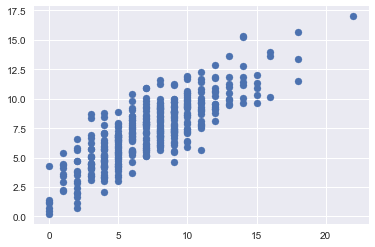

In [119]:
plt.scatter(y_test, preds)